In [1]:
from lambeq import BobcatParser, Rewriter, AtomicType, IQPAnsatz
from pytket.circuit.display import render_circuit_jupyter
from discopy import grammar

/home/dan/PycharmProjects/qec-qnlp/venv/lib/python3.10/site-packages/lambeq/ccg2discocat/ccg_parser.py:23: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
sentence = 'What is the dog doing'

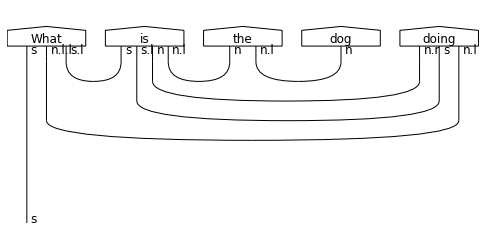

In [3]:
parser = BobcatParser()  # (GALLI TÜECHLI) will download Model so may take a while [1.5 GB]

diagram = parser.sentence2diagram(sentence)

grammar.draw(diagram, figsize=(14, 3), fontsize=12)

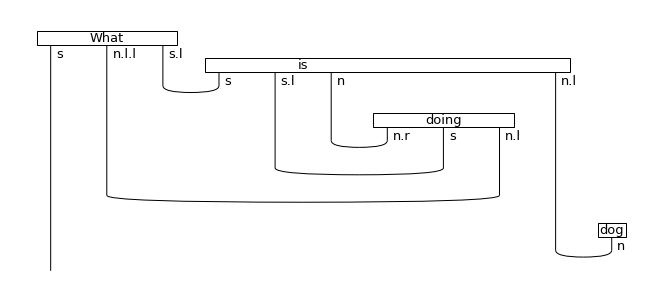

In [4]:
rewriter = Rewriter(['prepositional_phrase', 'determiner'])
rewritten_diagram = rewriter(diagram)

normalised_diagram = rewritten_diagram.normal_form()
normalised_diagram.draw(figsize=(9, 4), fontsize=13)

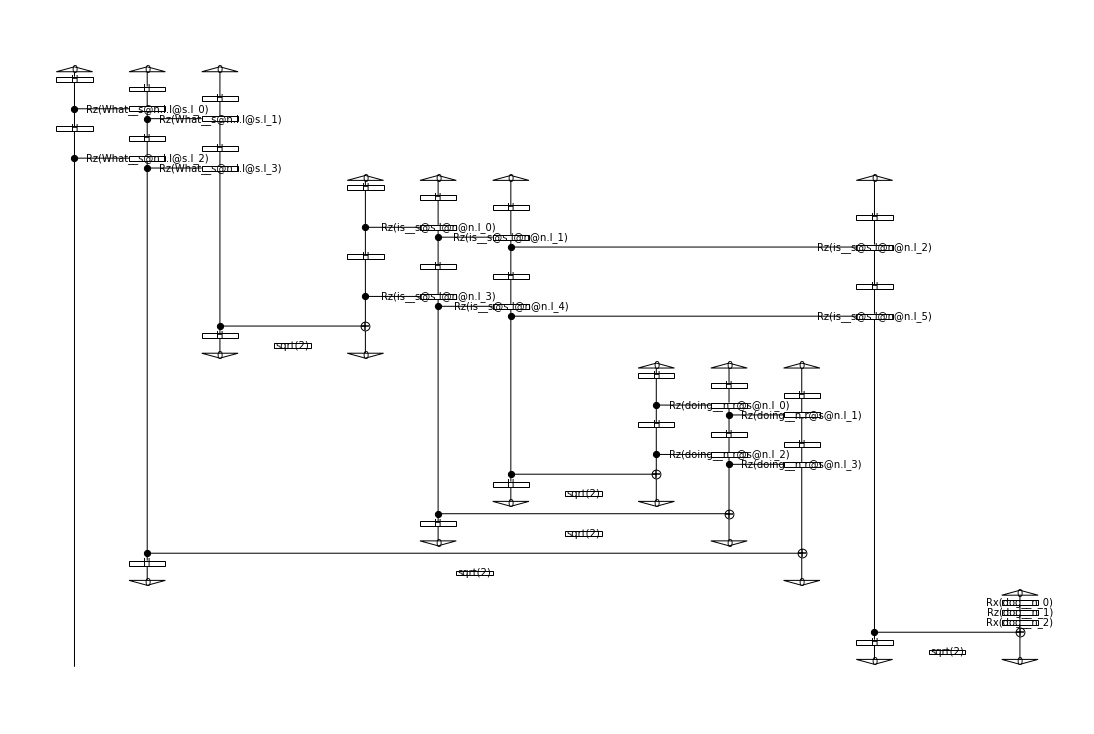

In [5]:
N = AtomicType.NOUN
S = AtomicType.SENTENCE

ansatz = IQPAnsatz({N: 1, S: 1}, n_layers=2)
discopy_circuit = ansatz(normalised_diagram)
discopy_circuit.draw(figsize=(15, 10))

tket_circuit = discopy_circuit.to_tk()

In [8]:
render_circuit_jupyter(tket_circuit)

In [9]:
from lambeq import NumpyModel
import numpy as np

In [44]:
BATCH_SIZE = 30
EPOCHS = 1000
SEED = 2

In [60]:
from pandas import read_csv

In [62]:
data = read_csv('./dataset.csv')

ValueError: could not convert string to float: 'cook creates complicated dish'

In [66]:
data2d = data.to_numpy()

sentences1 = []
sentences2 = []
results = []

for row in data2d:
    sentences1.append(row[0])
    sentences2.append(row[1])
    results.append(row[2])

In [69]:
print(results)

[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1]


In [73]:
parser = BobcatParser(root_cats=('NP', 'N'), verbose='text')

raw_train_diagrams1 = parser.sentences2diagrams(sentences1, suppress_exceptions=True)
raw_train_diagrams2 = parser.sentences2diagrams(sentences2, suppress_exceptions=True)

Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.


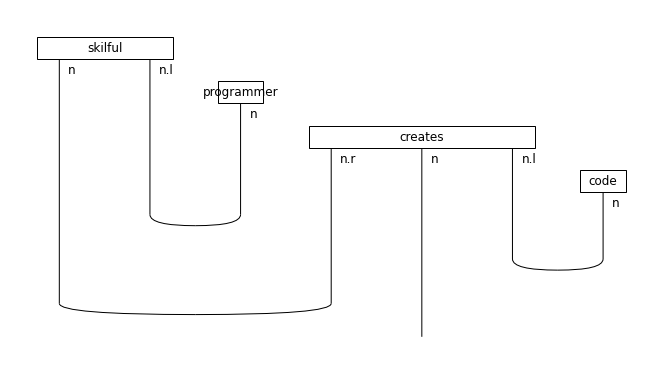

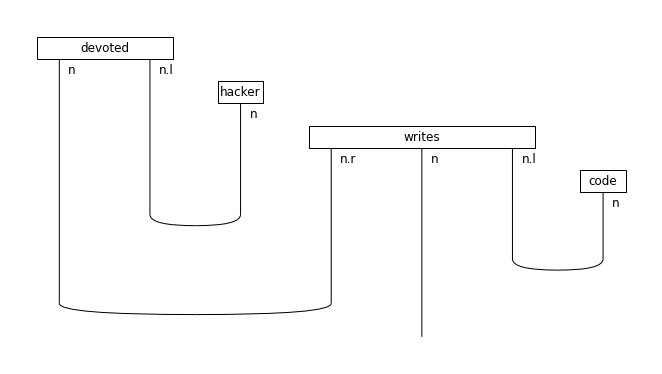

In [74]:
raw_train_diagrams1[0].draw(figsize=(9, 5), fontsize=12)
raw_train_diagrams2[0].draw(figsize=(9, 5), fontsize=12)